# Data Gathering
The orderbook data is being downloaded from Kaiku using a provided API key https://www.kaiko.com/

In [163]:
import requests
import pandas as pd
page_size = 10
headers = {
    'X-Api-Key': 'mh5o6vifqj84rx378p4288ix6xeduqfy',
}

params = (
    ('page_size', str(page_size)),
    ('limit_orders', '99999'),
)
next_url = 'https://us.market-api.kaiko.io/v1/data/order_book_snapshots.latest/exchanges/krkn/spot/btc-usd/snapshots/full'
collected_data = pd.DataFrame()

for thing in range(0,2):
    response = requests.get(next_url, headers=headers, params=params)
    next_url = response.json()['next_url']



    for item in range(0,page_size):
        date = response.json()['data'][item]['poll_timestamp']
        asks = pd.DataFrame.from_dict(response.json()['data'][item]['asks'], orient='columns')
        asks['type'] = 'a'
        asks['date'] = date
        asks = asks.set_index('date',drop=True)

        bids = pd.DataFrame.from_dict(response.json()['data'][item]['bids'], orient='columns')
        bids['type'] = 'b'
        bids['date'] = date
        bids = bids.set_index('date',drop=True)
        collected_data = pd.concat([collected_data,bids,asks])


In [164]:
collected_data

,amount,price,type
date,,,
1589952674132,9.132,9715.1,b
1589952674132,6.039,9715,b
1589952674132,0.018,9714.5,b
1589952674132,1.544,9714.3,b
1589952674132,0.09,9714,b
...,...,...,...
1589952132433,3.054,10218.5,a
1589952132433,0.5,10219.6,a
1589952132433,0.003,10219.7,a


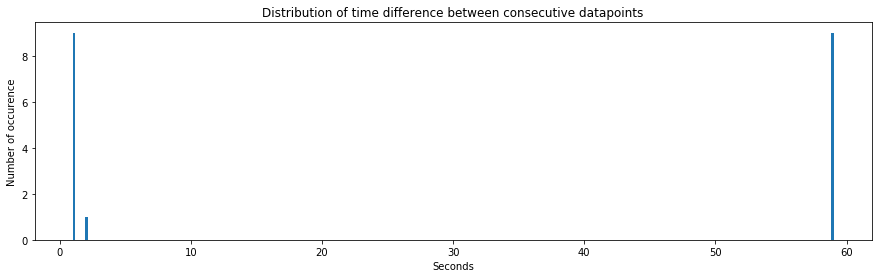

In [165]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,4));
plt.title('Distribution of time difference between consecutive datapoints');
plt.xlabel('Seconds')
plt.ylabel('Number of occurence')
plt.hist(pd.Series(list(collected_data.index.unique())).sort_values(ascending=True).map(lambda x: round(x/1000)).diff(),300);